In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
ROOT_PATH = "/content/gdrive/MyDrive/projectAI/"

PRICE_TYPE = "closePrice/" #closePrice/ or midPrice/
DATA_TYPE = "pcaNormalizedData/" #taNormalizedData/ pcaNormalizedData/ kBestTaNormalizedData
LABELING_STRATEGY = "labelingStrategy2/" #labelingStrategy1/ labelingStrategy2/
IMAGE_TYPE = "normalImages/" #gafImages/ mtfImages/ normalImages

PATH_LABELS = ROOT_PATH + PRICE_TYPE + DATA_TYPE + LABELING_STRATEGY
PATH_IMAGES = PATH_LABELS + IMAGE_TYPE
PATH_TRAIN_IMAGES = PATH_IMAGES + "Train"
PATH_TEST_IMAGES = PATH_IMAGES + "Test"
PATH_TRAIN_LABELS = PATH_LABELS + "y_train.csv"
PATH_TEST_LABELS = PATH_LABELS + "y_test.csv"

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers, models
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix , classification_report
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import math

In [ ]:
import os
import sys
os.chdir(ROOT_PATH)
!pwd
ROOT_DIR = os.path.abspath("")
print (ROOT_DIR)
sys.path.append(ROOT_DIR)

/content/gdrive/MyDrive/projectAI
/content/gdrive/MyDrive/projectAI


In [ ]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            img = cv2.resize(img, (80, 80))
            images.append(img)
    return images

In [ ]:
def plt_imshow(title, image):
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.show()

In [ ]:
x_train_images = load_images_from_folder(PATH_TRAIN_IMAGES)
x_test_images = load_images_from_folder(PATH_TEST_IMAGES)

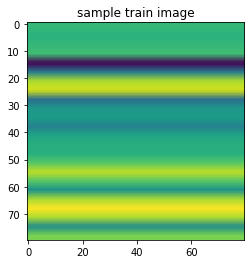

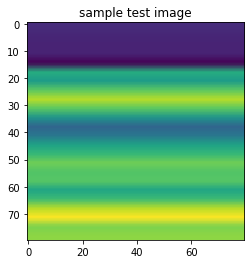

In [ ]:
plt_imshow("sample train image", x_train_images[0])
plt_imshow("sample test image", x_test_images[0])

In [ ]:
y_train_df = pd.read_csv(PATH_TRAIN_LABELS)     
y_test_df = pd.read_csv(PATH_TEST_LABELS)

In [ ]:
x_train_images = np.array(x_train_images)
x_test_images = np.array(x_test_images)
y_train = np.uint8(y_train_df["y_train"].to_numpy())
y_test = np.uint8(y_test_df["y_test"].to_numpy())

In [ ]:
print("x_train_images.shape: ", x_train_images.shape)
print("x_test_images.shape: ", x_test_images.shape)
print("y_train.shape: ", y_train.shape)
print("y_test.shape: ", y_test.shape)

x_train_images.shape:  (1588, 80, 80, 3)
x_test_images.shape:  (397, 80, 80, 3)
y_train.shape:  (1588,)
y_test.shape:  (397,)


In [ ]:
# ARCH - 1
LR = 0.001
cnn = tf.keras.models.Sequential([
            Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(80, 80, 3)),
            MaxPooling2D((2, 2)),
            Conv2D(64, kernel_size=(3, 3), activation='relu'),
            MaxPooling2D((2, 2)),
            Conv2D(64, kernel_size=(3, 3), strides=3, padding='same', activation='relu'),
            Flatten(),
            Dense(3, activation='softmax')]
        )
cnn.compile(optimizer=Adam(learning_rate=LR), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.summary()
cnn.fit(x_train_images, y_train, epochs=10)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 78, 78, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 39, 39, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 18, 18, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 6, 6, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 2304)             

In [ ]:
y_pred = cnn.predict(x_test_images)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes, digits=3))

Classification Report: 
               precision    recall  f1-score   support

           0      0.501     1.000     0.668       199
           1      0.000     0.000     0.000       103
           2      0.000     0.000     0.000        95

    accuracy                          0.501       397
   macro avg      0.167     0.333     0.223       397
weighted avg      0.251     0.501     0.335       397



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# ARCH - 2
LR = 0.001
cnn = tf.keras.models.Sequential([
            Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(80, 80, 3)),
            MaxPooling2D((2, 2)),
            Conv2D(32, kernel_size=(3, 3), activation='relu'),
            Conv2D(64, kernel_size=(3, 3), activation='relu'),
            Conv2D(64, kernel_size=(3, 3), activation='relu'),
            BatchNormalization(),
            Conv2D(128, kernel_size=(3, 3), strides=3, padding = 'same', activation='relu'),
            BatchNormalization(),
            Dropout(0.4),
            Flatten(),
            Dense(3, activation='softmax')]
        )
cnn.compile(optimizer=Adam(learning_rate=LR), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.summary()
cnn.fit(x_train_images, y_train, epochs=10)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 78, 78, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 39, 39, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 37, 37, 32)        9248      
                                                                 
 conv2d_15 (Conv2D)          (None, 35, 35, 64)        18496     
                                                                 
 conv2d_16 (Conv2D)          (None, 33, 33, 64)        36928     
                                                                 
 batch_normalization_7 (Batc  (None, 33, 33, 64)       256       
 hNormalization)                                      

In [ ]:
y_pred = cnn.predict(x_test_images)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes, digits=3))

Classification Report: 
               precision    recall  f1-score   support

           0      0.487     0.734     0.585       199
           1      0.197     0.126     0.154       103
           2      0.161     0.053     0.079        95

    accuracy                          0.413       397
   macro avg      0.282     0.304     0.273       397
weighted avg      0.334     0.413     0.352       397



In [ ]:
# ARCH - 3
LR = 0.001
cnn = tf.keras.models.Sequential([
                                  
            Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(80, 80, 3)),
            BatchNormalization(),
            Conv2D(32, kernel_size=(3, 3), activation='relu'),
            BatchNormalization(),
            Conv2D(32, kernel_size=(3, 3), strides=3, padding='same', activation='relu'),
            BatchNormalization(),
            Dropout(0.4),

            Conv2D(64, kernel_size=(3, 3), activation='relu'),
            BatchNormalization(),
            Conv2D(64, kernel_size=(3, 3), activation='relu'),
            BatchNormalization(),
            Conv2D(64, kernel_size=(3, 3), strides=3, padding='same', activation='relu'),
            BatchNormalization(),
            Dropout(0.4),

            Conv2D(128, kernel_size=4, activation='relu'),
            BatchNormalization(),
            Flatten(),
            Dropout(0.4),
            Dense(3, activation='softmax')]
        )
cnn.compile(optimizer=Adam(learning_rate=LR), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.summary()
cnn.fit(x_train_images, y_train, epochs=10)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 78, 78, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 78, 78, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_7 (Conv2D)           (None, 76, 76, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 76, 76, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 batch_normalization_2 (Batc  (None, 26, 26, 32)      

In [ ]:
y_pred = cnn.predict(x_test_images)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes, digits=3))

Classification Report: 
               precision    recall  f1-score   support

           0      0.541     0.623     0.579       199
           1      0.303     0.485     0.373       103
           2      0.000     0.000     0.000        95

    accuracy                          0.438       397
   macro avg      0.282     0.370     0.318       397
weighted avg      0.350     0.438     0.387       397

